In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import cv2
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input

In [ ]:
# !rm -rf IT1244_data
!git clone https://github.com/ContainerWhale/IT1244_data.git


fatal: destination path 'IT1244_data' already exists and is not an empty directory.


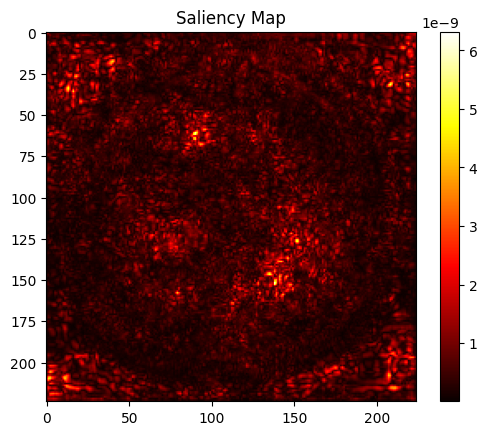

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

def generate_saliency_map(model, image_input, class_idx):
    """Generates a saliency map for a given image, class index, and model."""
    image_tensor = tf.cast(image_input, tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(image_tensor)
        # predictions = model([image_tensor, np.array([[]])])
        predictions = model(image_tensor)
        # select the specified class index
        loss = predictions[:, class_idx]
    gradients = tape.gradient(loss, image_tensor)

    # process the gradients for visualization
    gradients = tf.abs(gradients)
    gradients = tf.reduce_max(gradients, axis=-1)
    saliency_map = gradients.numpy()[0]

    return saliency_map

# random model for tests
model = VGG16(weights='imagenet')
# model = tf.keras.models.load_model('/content/VGG16.keras')
# model.summary()

img_path = "/content/IT1244_data/Brain Tumor/data/malignant/1.jpg"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array_expanded = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_array_expanded)
# img_preprocessed = (img_array_expanded)

# gen saliency map
class_index = 0 # can change
saliency_map = generate_saliency_map(model, img_preprocessed, class_index)

# display saliency map
plt.imshow(saliency_map, cmap='hot')
plt.colorbar()
plt.title('Saliency Map')
plt.show()


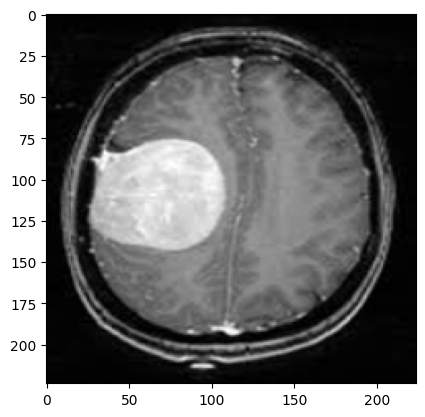

In [ ]:
img_path = "/content/IT1244_data/Brain Tumor/data/malignant/1.jpg"
img = cv2.imread(img_path)
img = cv2.resize(img, (224,224))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
# img = image.load_img(img_path, target_size=(224, 224))
# plt.imshow(img)

In [ ]:
np.max(saliency_map)

6.318942e-09

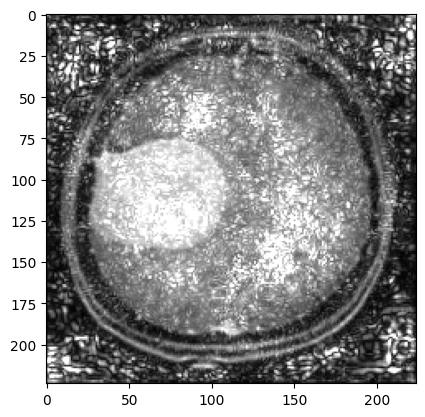

In [ ]:
# Normalize the heatmap values to the range [0, 255]
saliency_map = (saliency_map - np.min(saliency_map)) / (np.max(saliency_map) - np.min(saliency_map)) * 255

# Convert the heatmap image to 3 channels to match the RGB image
saliency_map_colored = cv2.cvtColor(saliency_map, cv2.COLOR_GRAY2RGB).astype("uint8")
# saliency_map_colored[:,:,[1,2]] = 0

# Blend the heatmap image with the RGB image
overlay = cv2.addWeighted(img, 0.8, saliency_map_colored, 3, 0)

# Display the result
plt.imshow(overlay)


In [ ]:
saliency_map_colored

array([[[46.02956 , 46.02956 , 46.02956 ],
        [59.80341 , 59.80341 , 59.80341 ],
        [26.357058, 26.357058, 26.357058],
        ...,
        [67.70446 , 67.70446 , 67.70446 ],
        [57.82519 , 57.82519 , 57.82519 ],
        [48.47893 , 48.47893 , 48.47893 ]],

       [[54.859165, 54.859165, 54.859165],
        [52.917873, 52.917873, 52.917873],
        [22.742638, 22.742638, 22.742638],
        ...,
        [66.67669 , 66.67669 , 66.67669 ],
        [70.58651 , 70.58651 , 70.58651 ],
        [73.260185, 73.260185, 73.260185]],

       [[22.971142, 22.971142, 22.971142],
        [21.537045, 21.537045, 21.537045],
        [45.759315, 45.759315, 45.759315],
        ...,
        [48.70387 , 48.70387 , 48.70387 ],
        [57.811306, 57.811306, 57.811306],
        [56.30295 , 56.30295 , 56.30295 ]],

       ...,

       [[27.170841, 27.170841, 27.170841],
        [40.867268, 40.867268, 40.867268],
        [43.68618 , 43.68618 , 43.68618 ],
        ...,
        [45.387646, 45.387

In [ ]:
alpha = 0.5

# Blend the heatmap image with the RGB image
overlay = cv2.addWeighted(img, 1-alpha, normalised_map, alpha, 0)
plt.imshow(overlay)
